# $(g-2)_\tau$ with ALPs

1911.06279

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica"
})

import particle.literals
from scipy.integrate import quad
import pandas as pd

## Universal scenario

In [2]:
me = particle.literals.e_minus.mass
mmu = particle.literals.mu_minus.mass
mtau = particle.literals.tau_minus.mass
mlep = [me/1000, mmu/1000, mtau/1000]
fa = 1000
alpha_e = 1/137.035999084
alpha_e_lep = [0.007425395650525988, 0.00782891226248143, 0.008124790150110821] #alpha_em computed with flavio at mu=m_lep

In [3]:
ma = [10**x for x in np.linspace(-3, 0, 300)] + [10**x for x in np.linspace(0, 3, 100)]

In [4]:
def sqrt(x):
    if np.real(x) > 0:
        return np.sqrt(x)
    else:
        res = np.sqrt(x)
        if np.imag(res) < 0:
            return -res
        else:
            return res

def h1(x0):
    if x0 > 6e3:
        return (-11+6*np.log(x0))/(3*x0)
    x = x0*(1+1e-8*1j)
    return np.real(1+2*x-x*(x-1)*np.log(x)+2*x*(x-3)*np.sqrt(x/(x-4))*np.log(0.5*(np.sqrt(x)+np.sqrt(x-4))))

In [5]:
20**2/mlep[1]**2

35830.439318315046

In [6]:
2**2/mlep[0]**2

15318631.739334758

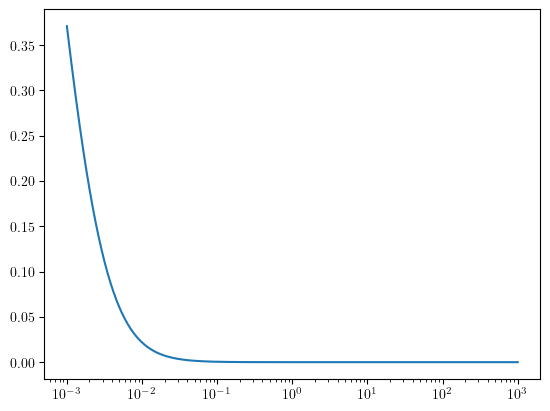

In [7]:
plt.semilogx(ma, [h1(m**2/mlep[0]**2) for m in ma])

In [8]:
def h2(x0):
    if x0 > 6e3:
        return 1.5+np.log(x0)
    x = x0*(1+1e-8*1j)
    return 1+x**2/6*np.log(x)-x/3-(x+2)/3*sqrt(x*(x-4))*np.log(0.5*(np.sqrt(x)+np.sqrt(x-4)))

/home/jorge/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jorge/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


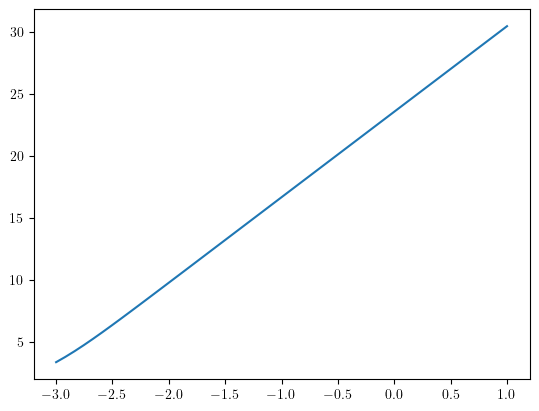

In [9]:
plt.plot(np.linspace(-3, 1, 50), [h2(100**x/mlep[0]**2) for x in np.linspace(-3, np.log(20), 50)])

In [10]:
def F(y, x):
    return 1/(1-y)*(h2(x)-h2(x/y))

In [11]:
def intF(ma, mlep, mloop):
    return quad(lambda z: F(z*(1-z)*ma**2/mloop**2, ma**2/mlep**2), 0, 1)[0]

/home/jorge/.local/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:577: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


/tmp/ipykernel_14474/4097514611.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda z: F(z*(1-z)*ma**2/mloop**2, ma**2/mlep**2), 0, 1)[0]


(0.001, 10)

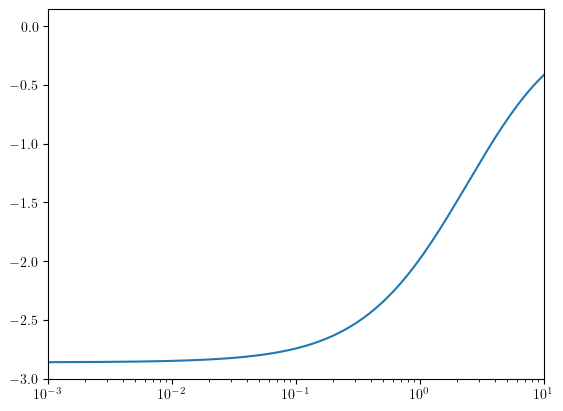

In [12]:
plt.semilogx(ma, [intF(m, 1.7, 1.7) for m in ma])
plt.xlim([0.001, 10])

/tmp/ipykernel_14474/4097514611.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda z: F(z*(1-z)*ma**2/mloop**2, ma**2/mlep**2), 0, 1)[0]


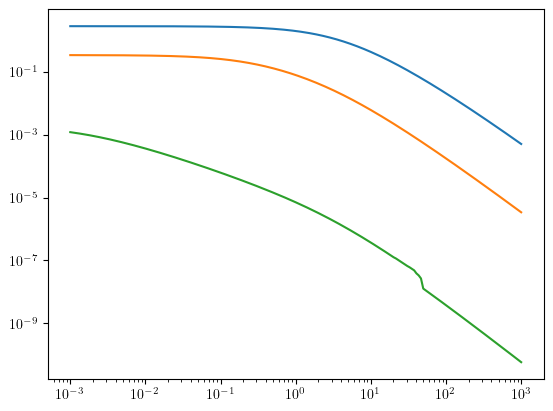

In [13]:
plt.loglog(ma, [-intF(m, mlep[2], mlep[2]) for m in ma])
plt.loglog(ma, [-intF(m, mlep[2], mlep[1]) for m in ma])
plt.loglog(ma, [-intF(m, mlep[2], mlep[0]) for m in ma])

/tmp/ipykernel_14474/4097514611.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda z: F(z*(1-z)*ma**2/mloop**2, ma**2/mlep**2), 0, 1)[0]


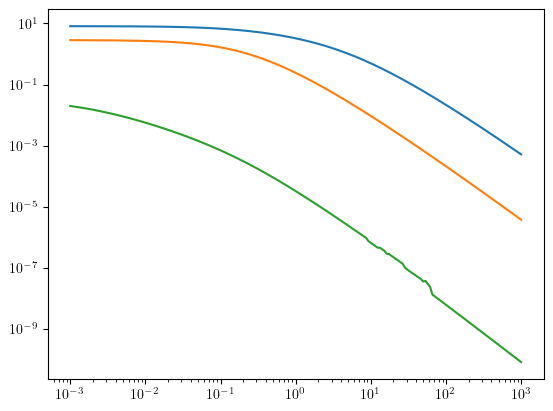

In [14]:
plt.loglog(ma, [-intF(m, mlep[1], mlep[2]) for m in ma])
plt.loglog(ma, [-intF(m, mlep[1], mlep[1]) for m in ma])
plt.loglog(ma, [-intF(m, mlep[1], mlep[0]) for m in ma])

/tmp/ipykernel_14474/4097514611.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda z: F(z*(1-z)*ma**2/mloop**2, ma**2/mlep**2), 0, 1)[0]


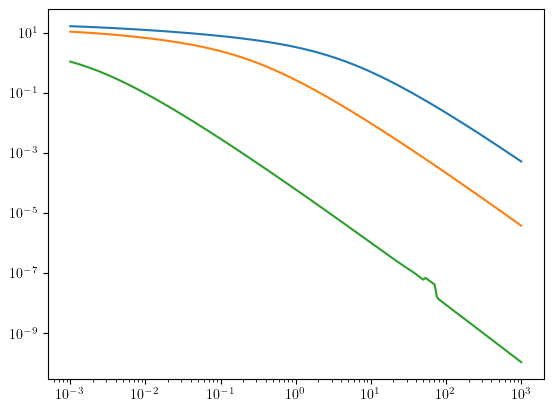

In [15]:
plt.loglog(ma, [-intF(m, mlep[0], mlep[2]) for m in ma])
plt.loglog(ma, [-intF(m, mlep[0], mlep[1]) for m in ma])
plt.loglog(ma, [-intF(m, mlep[0], mlep[0]) for m in ma])

/tmp/ipykernel_14474/4097514611.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda z: F(z*(1-z)*ma**2/mloop**2, ma**2/mlep**2), 0, 1)[0]


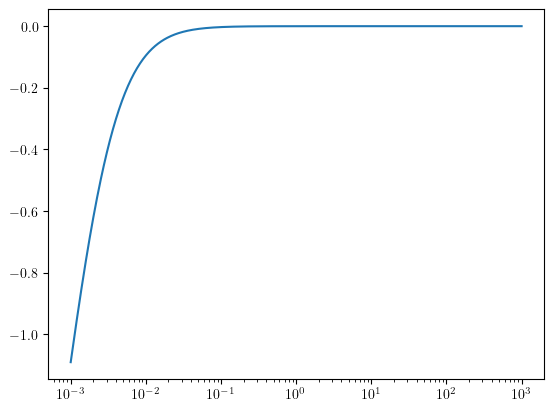

In [16]:
plt.semilogx(ma, [intF(m, mlep[0], mlep[0]) for m in ma])

/tmp/ipykernel_14474/4097514611.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda z: F(z*(1-z)*ma**2/mloop**2, ma**2/mlep**2), 0, 1)[0]


Text(0, 0.5, '$|\\Delta a_e/c_{\\ell\\ell}^2|$')

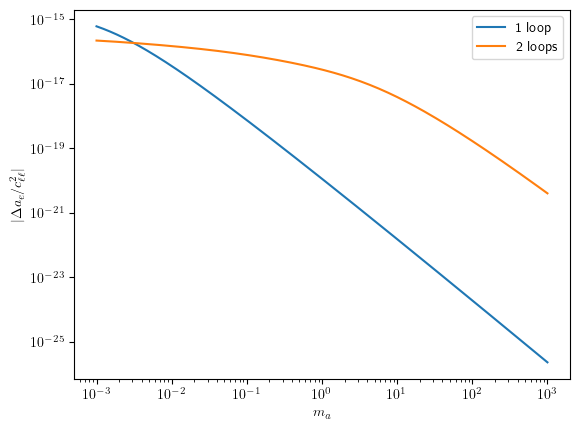

In [17]:
plt.loglog(ma, [mlep[0]**2/(4*np.pi*fa)**2*h1(m**2/mlep[0]**2) for m in ma], label='1 loop')
plt.loglog(ma, [-mlep[0]**2/(4*np.pi*fa)**2*2*alpha_e_lep[0]/np.pi*sum(intF(m, mlep[0], mlep[i]) for i in range(3)) for m in ma], label='2 loops')
plt.legend()
plt.xlabel(r'$m_a$')
plt.ylabel(r'$|\Delta a_e/c_{\ell\ell}^2|$')

/tmp/ipykernel_14474/4097514611.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda z: F(z*(1-z)*ma**2/mloop**2, ma**2/mlep**2), 0, 1)[0]


Text(0, 0.5, '$|\\Delta a_\\mu/c_{\\ell\\ell}^2|$')

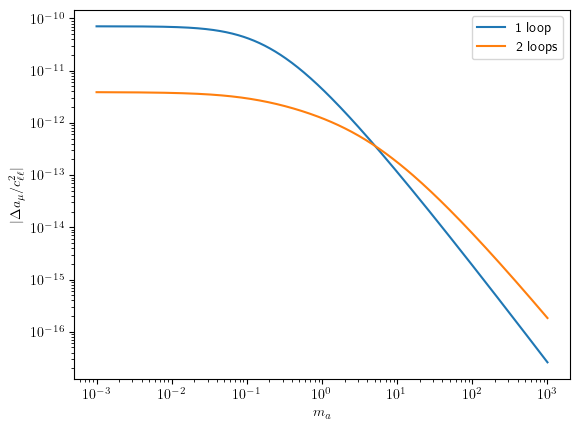

In [18]:
plt.loglog(ma, [mlep[1]**2/(4*np.pi*fa)**2*h1(m**2/mlep[1]**2) for m in ma], label='1 loop')
plt.loglog(ma, [-mlep[1]**2/(4*np.pi*fa)**2*2*alpha_e_lep[1]/np.pi*sum(intF(m, mlep[1], mlep[i]) for i in range(3)) for m in ma], label='2 loops')
plt.legend()
plt.xlabel(r'$m_a$')
plt.ylabel(r'$|\Delta a_\mu/c_{\ell\ell}^2|$')

In [19]:
def alep(ma):
    a = [0, 0, 0]
    for i in range(3):
        x = ma**2/mlep[i]**2
        integral = sum(quad(lambda z: F(z*(1-z)*ma**2/mlep[j]**2, x), 0, 1)[0] for j in range(3))
        a[i] -= h1(x) # lepton-lepton-ALP loop
        a[i] -= 2*alpha_e_lep[i]/np.pi*integral # 2 loops
        a[i] *= mlep[i]**2/(4*np.pi*fa)**2
    return a

In [20]:
alist = [alep(m) for m in ma]

/tmp/ipykernel_14474/2872614643.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral = sum(quad(lambda z: F(z*(1-z)*ma**2/mlep[j]**2, x), 0, 1)[0] for j in range(3))


In [21]:
ae = [a[0] for a in alist]
amu = [a[1] for a in alist]
atau = [a[2] for a in alist]

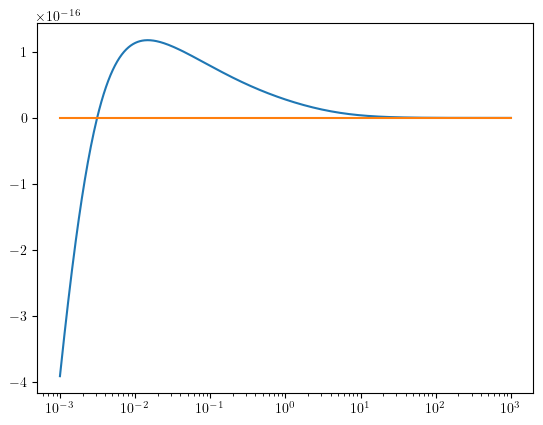

In [22]:
plt.semilogx(ma, [np.real(a) for a in ae])
plt.semilogx(ma, [np.imag(a) for a in ae])

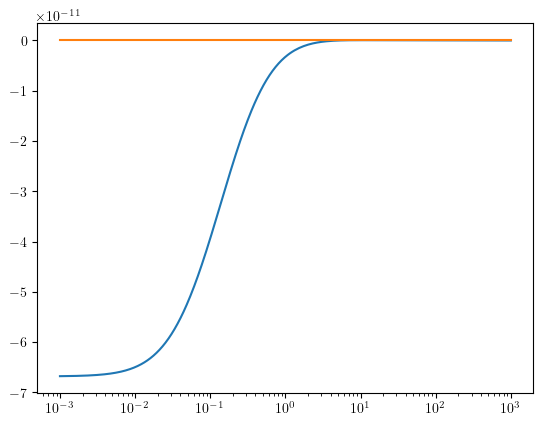

In [23]:
plt.semilogx(ma, [np.real(a) for a in amu])
plt.semilogx(ma, [np.imag(a) for a in amu])

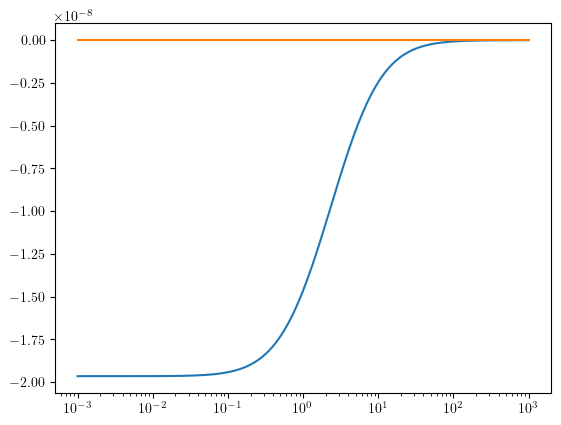

In [24]:
plt.semilogx(ma, [np.real(a) for a in atau])
plt.semilogx(ma, [np.imag(a) for a in atau])

In [25]:
atau_SM = 117721e-8+5e-8 # hep-ph/0701260

atau_ATLASPb = -0.019 # 2307.15160
atau_ATLASpair = -1.8e-3 # 2307.14133
atau_CMS = 0.01-0.089 # 2206.05192

bound_ATLASPb = np.sqrt((atau_ATLASPb-atau_SM)/np.real(np.array(atau)))
bound_ATLASpair = np.sqrt((atau_ATLASpair-atau_SM)/np.real(np.array(atau)))
bound_CMS = np.sqrt((atau_CMS-atau_SM)/np.real(np.array(atau)))
bound_BelleII = np.sqrt(-1e-6/np.real(np.array(atau))) # 0807.2366

In [26]:
amu_SM   = 116591810e-11-43e-11 # 2006.04822
amu_FNAL = 116592055e-11+24e-11 # 2308.06230

amu_SM_m = 116591810e-11+43e-11
amu_FNAL_m = 116592055e-11-24e-11

amu_SM_2   = 116591810e-11-2*43e-11 # 2006.04822
amu_FNAL_2 = 116592055e-11+2*24e-11 # 2308.06230

amu_SM_2m = 116591810e-11+2*43e-11
amu_FNAL_2m = 116592055e-11-2*24e-11

In [27]:
ma_amu = []
bound_amu = []
bound_amu_m = []
bound_amu_2 = []
bound_amu_2m = []
for m, a in zip(ma, amu):
    if np.real(a) > 0:
        bound_amu.append(np.sqrt((amu_FNAL-amu_SM)/np.real(a)))
        bound_amu_m.append(np.sqrt((amu_FNAL_m-amu_SM_m)/np.real(a)))
        bound_amu_2.append(np.sqrt((amu_FNAL_2-amu_SM_2)/np.real(a)))
        bound_amu_2m.append(np.sqrt((amu_FNAL_2m-amu_SM_2m)/np.real(a)))
        ma_amu.append(m)

In [28]:
ae_exp_p  = 0.00115965218059 + 13e-14 #2209.13084
ae_exp_m  = 0.00115965218059 - 13e-14
ae_Cs =     0.00115965218161 + 23e-14 #1812.04130
ae_8Be =    0.001159652180252 - 9.5e-14 #DOI:10.1038/s41586-020-2964-7

In [29]:
0.00115965218059-0.001159652181547

-9.57000104162553e-13

In [30]:
ma_ae_Cs = []
ma_ae_8Be = []
bound_ae_Cs = []
bound_ae_8Be = []
for m, a in zip(ma, ae):
    if np.real(a) < 0 and m < 2e-2:
        bound_ae_Cs.append(np.sqrt((ae_exp_m-ae_Cs)/np.real(a)))
        ma_ae_Cs.append(m)
    else:
        bound_ae_8Be.append(np.sqrt((ae_exp_p-ae_8Be)/np.real(a)))
        ma_ae_8Be.append(m)


In [31]:
pd.DataFrame({'ma_GeV': ma, 'c_g2tau_ATLAS': bound_ATLASpair, 'g2tau_BelleII': bound_BelleII}).to_csv('../money_plot/g2tau_lfu.csv', index=False)
pd.DataFrame({'ma_GeV': ma_ae_Cs, 'c_g2e_Cs': bound_ae_Cs}).to_csv('../money_plot/g2e_Cs_lfu.csv', index=False)
pd.DataFrame({'ma_GeV': ma_ae_8Be, 'c_g2e_Be': bound_ae_8Be}).to_csv('../money_plot/g2e_Be_lfu.csv', index=False)
pd.DataFrame({'ma_GeV': ma_amu, 'c_g2mu': bound_amu}).to_csv('../money_plot/g2mu_lfu.csv', index=False)

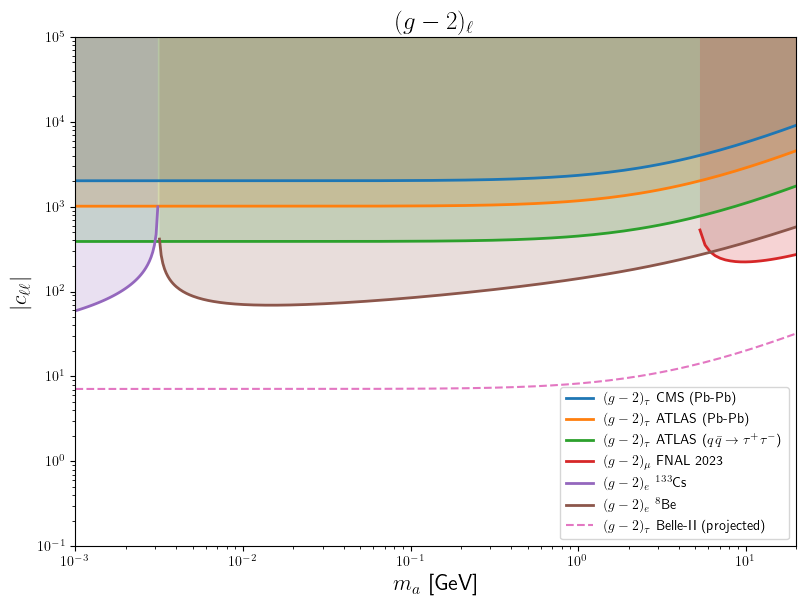

In [32]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(ma, bound_CMS, label=r'$(g-2)_\tau$ CMS (Pb-Pb)', lw=2)
plt.fill_between(ma, bound_CMS, 1e7, alpha=0.2)
plt.plot(ma, bound_ATLASPb, label=r'$(g-2)_\tau$ ATLAS (Pb-Pb)', lw=2)
plt.fill_between(ma, bound_ATLASPb, 1e7, alpha=0.2)
plt.plot(ma, bound_ATLASpair, label=r'$(g-2)_\tau$ ATLAS ($q\bar{q}\to\tau^+\tau^-$)', lw=2)
plt.fill_between(ma, bound_ATLASpair, 1e7, alpha=0.2)



plt.plot(ma_amu, bound_amu, label=r'$(g-2)_\mu$ FNAL 2023', lw=2)
plt.fill_between(ma_amu, bound_amu, 1e7, alpha=0.2)

plt.plot(ma_ae_Cs, bound_ae_Cs, label=r'$(g-2)_e$ ${}^{133}$Cs', lw=2)
plt.fill_between(ma_ae_Cs, bound_ae_Cs, 1e7, alpha=0.2)

plt.plot(ma_ae_8Be, bound_ae_8Be, label=r'$(g-2)_e$ ${}^{8}$Be', lw=2)
plt.fill_between(ma_ae_8Be, bound_ae_8Be, 1e7, alpha=0.2)

plt.plot(ma, bound_BelleII, label=r'$(g-2)_\tau$ Belle-II (projected)', ls='dashed')

plt.xlabel(r'$m_a$ [GeV]', fontsize=16)
plt.ylabel(r'$|c_{\ell\ell}|$', fontsize=16)
plt.title(r'$(g-2)_\ell$', fontsize=18)
plt.xlim(1e-3, 2e1)
plt.ylim(0.1, 1e5)
plt.legend()
plt.tight_layout(pad=0.5)
#fig.patch.set_alpha(0)
plt.savefig('g2_lim.png')

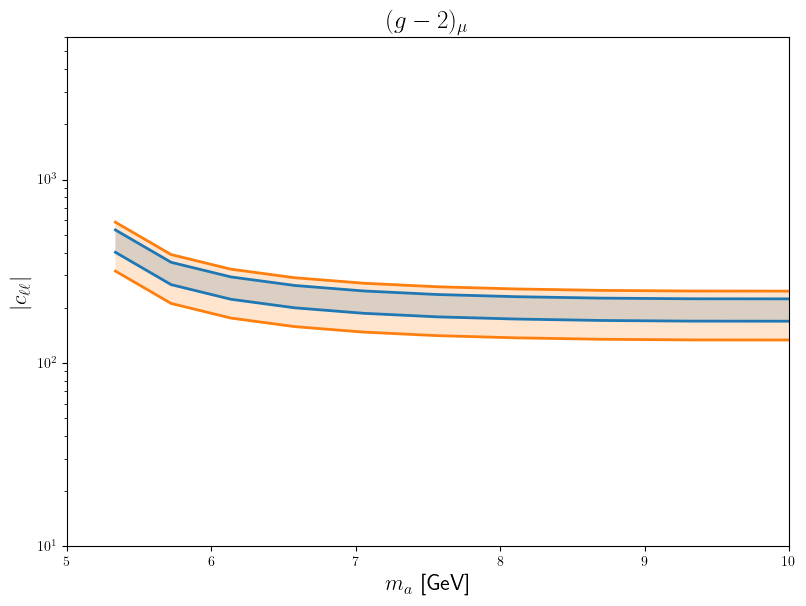

In [33]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
#ax.set_xscale('log')
ax.set_yscale('log')




plt.plot(ma_amu, bound_amu, label=r'$(g-2)_\mu$ FNAL 2023', lw=2)
plt.plot(ma_amu, bound_amu_m, label=r'$(g-2)_\mu$ FNAL 2023', lw=2, c='tab:blue')
plt.fill_between(ma_amu, bound_amu, bound_amu_m, alpha=0.2)

plt.plot(ma_amu, bound_amu_2, label=r'$(g-2)_\mu$ FNAL 2023', lw=2, c='tab:orange')
plt.plot(ma_amu, bound_amu_2m, label=r'$(g-2)_\mu$ FNAL 2023', lw=2, c='tab:orange')
plt.fill_between(ma_amu, bound_amu_2, bound_amu_2m, alpha=0.2)

plt.xlabel(r'$m_a$ [GeV]', fontsize=16)
plt.ylabel(r'$|c_{\ell\ell}|$', fontsize=16)
plt.title(r'$(g-2)_\mu$', fontsize=18)
plt.xlim(5, 10)
plt.ylim(10, 6000)
#plt.legend()
plt.tight_layout(pad=0.5)
plt.savefig('g2mu.png')

## $\tau$-philic scenario

In [34]:
def alep_tp(ma):
    a = [0, 0, 0]
    for i in range(3):
        x = ma**2/mlep[i]**2
        integral = quad(lambda z: F(z*(1-z)*ma**2/mlep[2]**2, x), 0, 1)[0]
        a[i] -= h1(x)*float(i==2) # lepton-lepton-ALP loop
        a[i] -= 2*alpha_e_lep[i]/np.pi*integral # 2 loops
        a[i] *= mlep[i]**2/(4*np.pi*fa)**2
    return a

In [35]:
alist_tp = [alep_tp(m) for m in ma]

/tmp/ipykernel_14474/2618351583.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral = quad(lambda z: F(z*(1-z)*ma**2/mlep[2]**2, x), 0, 1)[0]


In [36]:
ae_tp = [a[0] for a in alist_tp]
amu_tp = [a[1] for a in alist_tp]
atau_tp = [a[2] for a in alist_tp]

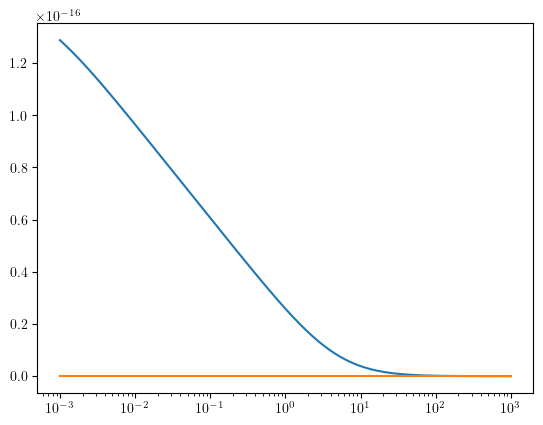

In [37]:
plt.semilogx(ma, [np.real(a) for a in ae_tp])
plt.semilogx(ma, [np.imag(a) for a in ae_tp])

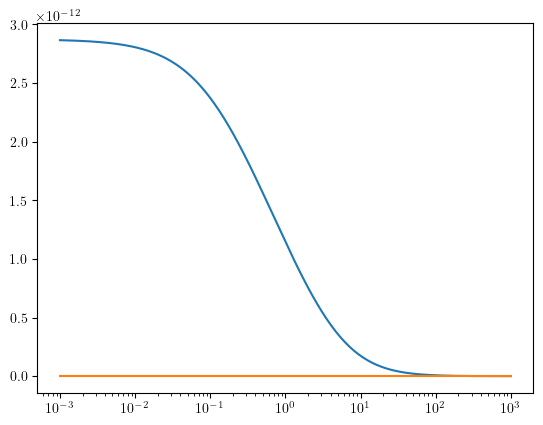

In [38]:
plt.semilogx(ma, [np.real(a) for a in amu_tp])
plt.semilogx(ma, [np.imag(a) for a in amu_tp])

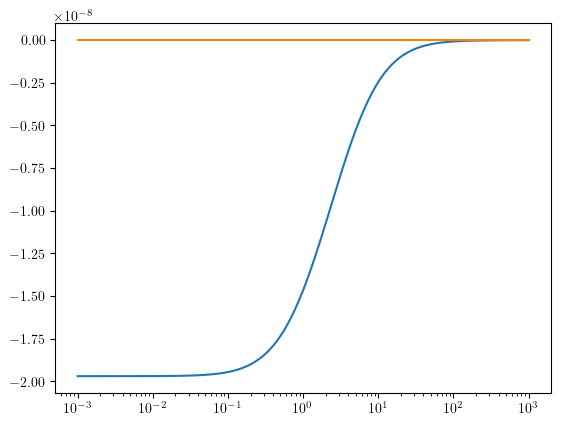

In [39]:
plt.semilogx(ma, [np.real(a) for a in atau_tp])
plt.semilogx(ma, [np.imag(a) for a in atau_tp])

In [40]:
bound_ATLASPb_tp = np.sqrt((atau_ATLASPb-atau_SM)/np.real(np.array(atau_tp)))
bound_ATLASpair_tp = np.sqrt((atau_ATLASpair-atau_SM)/np.real(np.array(atau_tp)))
bound_CMS_tp = np.sqrt((atau_CMS-atau_SM)/np.real(np.array(atau_tp)))
bound_BelleII_tp = np.sqrt(-1e-6/np.real(np.array(atau_tp))) # 0807.2366

In [41]:
ma_amu_tp = []
bound_amu_tp = []
bound_amu_m_tp = []
bound_amu_2_tp = []
bound_amu_2m_tp = []
for m, a in zip(ma, amu_tp):
    if np.real(a) > 0:
        bound_amu_tp.append(np.sqrt((amu_FNAL-amu_SM)/np.real(a)))
        bound_amu_m_tp.append(np.sqrt((amu_FNAL_m-amu_SM_m)/np.real(a)))
        bound_amu_2_tp.append(np.sqrt((amu_FNAL_2-amu_SM_2)/np.real(a)))
        bound_amu_2m_tp.append(np.sqrt((amu_FNAL_2m-amu_SM_2m)/np.real(a)))
        ma_amu_tp.append(m)

In [42]:
ma_ae_Cs_tp = []
ma_ae_8Be_tp = []
bound_ae_Cs_tp = []
bound_ae_8Be_tp = []
for m, a in zip(ma, ae_tp):
    if np.real(a) < 0 and m < 2e-2:
        bound_ae_Cs_tp.append(np.sqrt((ae_exp_m-ae_Cs)/np.real(a)))
        ma_ae_Cs_tp.append(m)
    else:
        bound_ae_8Be_tp.append(np.sqrt((ae_exp_p-ae_8Be)/np.real(a)))
        ma_ae_8Be_tp.append(m)

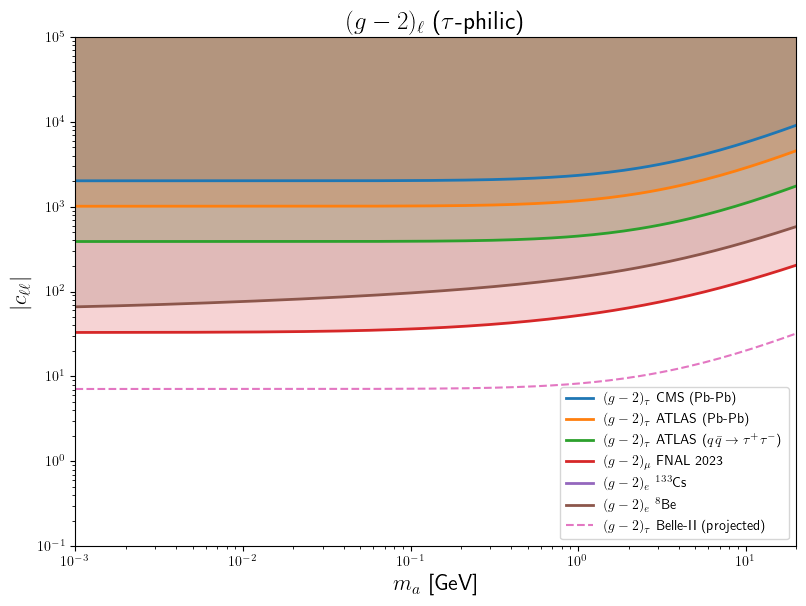

In [43]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(ma, bound_CMS_tp, label=r'$(g-2)_\tau$ CMS (Pb-Pb)', lw=2)
plt.fill_between(ma, bound_CMS_tp, 1e7, alpha=0.2)
plt.plot(ma, bound_ATLASPb_tp, label=r'$(g-2)_\tau$ ATLAS (Pb-Pb)', lw=2)
plt.fill_between(ma, bound_ATLASPb_tp, 1e7, alpha=0.2)
plt.plot(ma, bound_ATLASpair_tp, label=r'$(g-2)_\tau$ ATLAS ($q\bar{q}\to\tau^+\tau^-$)', lw=2)
plt.fill_between(ma, bound_ATLASpair_tp, 1e7, alpha=0.2)



plt.plot(ma_amu_tp, bound_amu_tp, label=r'$(g-2)_\mu$ FNAL 2023', lw=2)
plt.fill_between(ma_amu_tp, bound_amu_tp, 1e7, alpha=0.2)

plt.plot(ma_ae_Cs_tp, bound_ae_Cs_tp, label=r'$(g-2)_e$ ${}^{133}$Cs', lw=2)
plt.fill_between(ma_ae_Cs_tp, bound_ae_Cs_tp, 1e7, alpha=0.2)

plt.plot(ma_ae_8Be_tp, bound_ae_8Be_tp, label=r'$(g-2)_e$ ${}^{8}$Be', lw=2)
plt.fill_between(ma_ae_8Be_tp, bound_ae_8Be_tp, 1e7, alpha=0.2)

plt.plot(ma, bound_BelleII_tp, label=r'$(g-2)_\tau$ Belle-II (projected)', ls='dashed')

plt.xlabel(r'$m_a$ [GeV]', fontsize=16)
plt.ylabel(r'$|c_{\ell\ell}|$', fontsize=16)
plt.title(r'$(g-2)_\ell$ ($\tau$-philic)', fontsize=18)
plt.xlim(1e-3, 2e1)
plt.ylim(0.1, 1e5)
plt.legend()
plt.tight_layout(pad=0.5)
#fig.patch.set_alpha(0)
plt.savefig('g2_lim_tp.png')

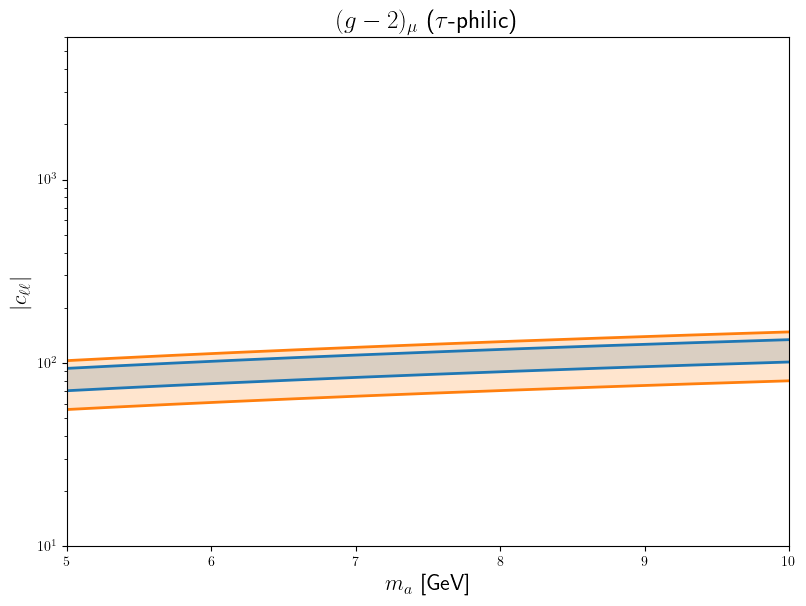

In [44]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
#ax.set_xscale('log')
ax.set_yscale('log')




plt.plot(ma_amu_tp, bound_amu_tp, label=r'$(g-2)_\mu$ FNAL 2023', lw=2)
plt.plot(ma_amu_tp, bound_amu_m_tp, label=r'$(g-2)_\mu$ FNAL 2023', lw=2, c='tab:blue')
plt.fill_between(ma_amu_tp, bound_amu_tp, bound_amu_m_tp, alpha=0.2)

plt.plot(ma_amu_tp, bound_amu_2_tp, label=r'$(g-2)_\mu$ FNAL 2023', lw=2, c='tab:orange')
plt.plot(ma_amu_tp, bound_amu_2m_tp, label=r'$(g-2)_\mu$ FNAL 2023', lw=2, c='tab:orange')
plt.fill_between(ma_amu_tp, bound_amu_2_tp, bound_amu_2m_tp, alpha=0.2)

plt.xlabel(r'$m_a$ [GeV]', fontsize=16)
plt.ylabel(r'$|c_{\ell\ell}|$', fontsize=16)
plt.title(r'$(g-2)_\mu$ ($\tau$-philic)', fontsize=18)
plt.xlim(5, 10)
plt.ylim(10, 6000)
#plt.legend()
plt.tight_layout(pad=0.5)
plt.savefig('g2mu_tp.png')

In [45]:
pd.DataFrame({'ma_GeV': ma, 'c_g2tau_ATLAS': bound_ATLASpair_tp, 'g2tau_BelleII': bound_BelleII}).to_csv('../money_plot/g2tau_tp.csv', index=False)
#pd.DataFrame({'ma_GeV': ma_ae_Cs_tp, 'c_g2e_Cs': bound_ae_Cs_tp}).to_csv('../money_plot/g2e_Cs_tp.csv', index=False)
pd.DataFrame({'ma_GeV': ma_ae_8Be_tp, 'c_g2e_Be': bound_ae_8Be_tp}).to_csv('../money_plot/g2e_Be_tp.csv', index=False)
pd.DataFrame({'ma_GeV': ma_amu_tp, 'c_g2mu': bound_amu_tp}).to_csv('../money_plot/g2mu_tp.csv', index=False)